# ネットワーク分析
ネットワーク(グラフ)とは、対象における構造を抽象化したもの
頂点と辺で構成する

## ネットワーク例
* SNSにおけるユーザ間の関係性
* Webページのリンクの繋がり
* 論文引用による関係

## 着目
ネットワークの中心
ネットワーク内のグルーピング
ネットワーク経路のボトルネック

## 活用
関係性の予測・推薦
似た構造のネットワークの作成

## 

# 
特徴量
個々の辺や頂点の特徴
ネットワーク全体の特徴を表す
アルゴリズム
特徴量や経路探索、ネットワーク分割など
モデル
ネットワークの生成過程のメカニズム
プロセス
情報伝搬などネットワーク上における振る舞いを理解する
 
# Pythonライブラリ
1. NetworkX
2. Gephi
3. graph-tool
4. igraph



# ネットワーク分析の流れ
* ネットワークを可視化して全体を俯瞰する
* 特徴的な頂点や辺を見つける
* 個々の頂点や辺、ネットワーク全体の特性を理解する
* ネットワーク中のグループの数や、その大きさを確認する

## データ構造
* edge list
* adjacency matrix


# NetworkX

draw_circular
頂点を円周上に配置する

draw_kamada_kawai
頂点を力学モデルにより配置する

draw_random
頂点をランダムに配置する

draw_spectral
ネットワークを表す行列の固有ベクトルにより、頂点を配置する

draw_spring
頂点を力学モデルにより配置する

draw_shell
頂点を同心円上に配置する



## 中心性の計算
1. 次数中心性(Degree Centrality)  
多くの頂点とつながっている頂点を中心的とみなす
2. 固有ベクトル中心性(Eigenvector Centrality)  
周囲の頂点の中心性も加味し、多くの中心的な頂点とつながっている頂点を中心的とみなす
3. 近接中心性(Closeness Centrality)  
ネットワーク中の他の頂点へ短い距離で到達できる頂点を中心的とみなす
4. 媒介中心性(Betweenness Centrality)  
その頂点がなくなると多くの経路が分断されてしまうような頂点を中心的とみなす


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

rnd = nx.gnp_random_graph(10, 0.3)

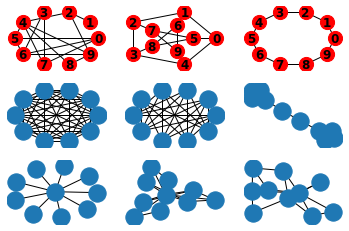

In [2]:
plt.subplot(331)
nx.draw_circular(rnd, node_size=200,
                 node_color='red',
                 with_labels=True,
                 font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, 
              nlist=[range(5, 10), range(5)],
              node_size=200,
              node_color='red',
              with_labels=True,
              font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, 
                 node_size=200,
                 node_color='red',
                 with_labels=True,
                 font_weight='bold')

K_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(K_10)

K_5_5 = nx.complete_bipartite_graph(5, 5)
plt.subplot(335)
nx.draw_circular(K_5_5)

barbell = nx.barbell_graph(4, 2)
plt.subplot(336)
nx.draw_spring(barbell)

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star)

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel)

ba = nx.barabasi_albert_graph(10, 2)
plt.subplot(339)
nx.draw_spring(ba)

plt.savefig('graphs.png')
plt.show()

In [40]:
graph = nx.Graph()
graph.add_edge(4, 5)
graph.add_edge(5, 2)


In [41]:
graph.number_of_edges()

2

In [42]:
graph.number_of_nodes()

3

In [43]:
nx.adjacency_matrix(graph)

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [44]:
nx.adjacency_matrix(graph).todense()

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=int64)

In [45]:
graph.degree()

DegreeView({4: 1, 5: 2, 2: 1})

In [46]:
nx.degree_histogram(graph)

[0, 2, 1]

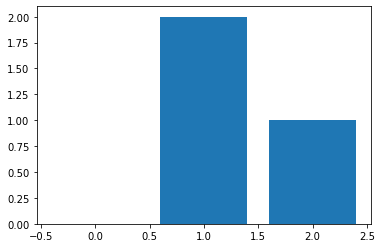

In [47]:
plt.bar(range(3), height=nx.degree_histogram(graph));

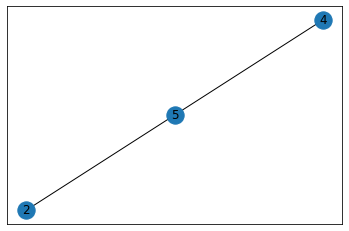

In [48]:
nx.draw_networkx(graph)

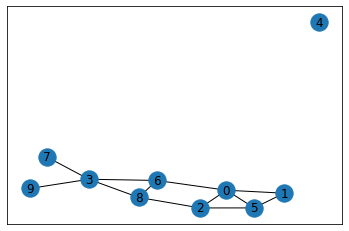

In [12]:
nx.draw_networkx(rnd)

## 特徴量の計算
頂点や辺の数など、ネットワークの構造的特徴を表す量を特徴量と呼ぶ。


## コミュニティの抽出
密に結びついた頂点のネットワークのことを、コミュニティと呼ぶ


## 隣接行列・辺リスト

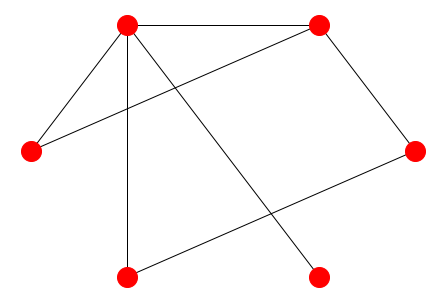

In [35]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F"])
G.add_edges_from([("A", "B"), 
                  ("B", "C"), 
                  ("B", "D"),
                  ("C", "D"),
                  ("A", "E"),
                  ("C", "E"),
                  ("C", "F")]
                )
nx.draw_circular(G, 
        node_size=400, 
        with_lables=True, 
        node_color='red',
        font_weight='bold')

# 無向グラフ

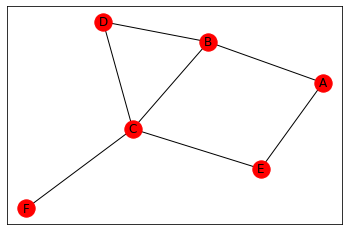

In [52]:
import networkx as nx

graph = nx.Graph()
graph.add_nodes_from(["A", "B", "C", "D", "E", "F"])
graph.add_edges_from([("A", "B"), 
                  ("B", "C"), 
                  ("B", "D"),
                  ("C", "D"),
                  ("A", "E"),
                  ("C", "E"),
                  ("C", "F")]
                )
nx.draw_networkx(graph,
                 node_color='red',
                 with_lables=True)
plt.savefig('graph_sample.png')
plt.show()

# 有向グラフ

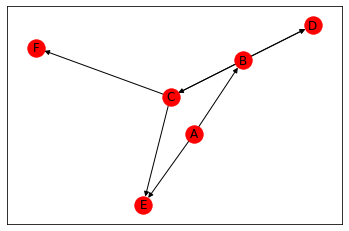

In [53]:
import networkx as nx

digraph = nx.DiGraph()
digraph.add_nodes_from(["A", "B", "C", "D", "E", "F"])
digraph.add_edges_from([("A", "B"), 
                  ("B", "C"), 
                  ("B", "D"),
                  ("C", "D"),
                  ("A", "E"),
                  ("C", "E"),
                  ("C", "F")]
                )
nx.draw_networkx(digraph,
                 node_color='red',
                 with_lables=True)
plt.savefig('digraph_sample.png')
plt.show()

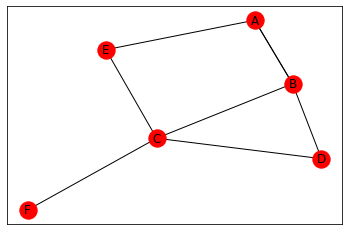

In [71]:
import networkx as nx

multigraph = nx.MultiGraph()
multigraph.add_nodes_from(["A", "B", "C", "D", "E", "F"])
multigraph.add_edges_from([("A", "B"), 
                           ("B", "C"), 
                           ("B", "D"),
                           ("C", "D"),
                           ("A", "E"),
                           ("C", "E"),
                           ("C", "F"),
                           ("B", "A"),
                           ("D", "D")]
                           )
nx.draw_networkx(multigraph,
                 node_color='red',
                 with_lables=True)
plt.savefig('multigraph_sample.png')
plt.show()